In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


## IMPORT THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")
print(f'Rows:{df.shape[0]} \ncolumns:{df.shape[1]}')

Rows:3900 
columns:18


In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## DATA CLEANING

In [5]:
# Dropping unwanted columns
df.drop(columns = ['Customer ID'], inplace = True)

df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.isna().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df.drop_duplicates(inplace = True)
df.shape

(3900, 17)

## EDA

<Axes: xlabel='Age', ylabel='Density'>

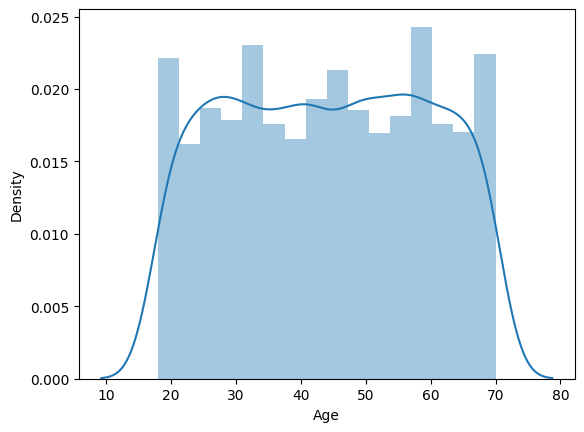

In [8]:
# Distribution of Age

sns.distplot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

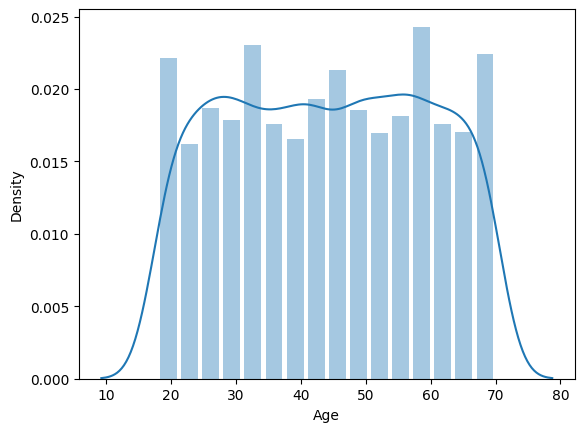

In [9]:
sns.distplot(df['Age'], hist_kws = {'rwidth': 0.80})

<Axes: xlabel='Age', ylabel='Density'>

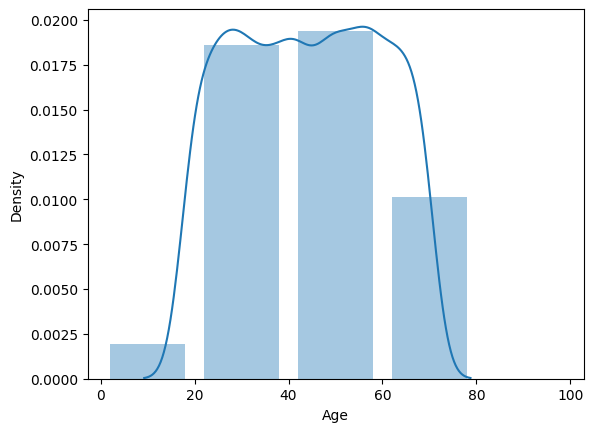

In [10]:
sns.distplot(df['Age'], hist_kws = {'rwidth': 0.80}, bins = np.array([0, 20, 40, 60, 80, 100]))

**Conclusion:** Mostly people shopping in this mall with the age group of 40 - 60 followed by 20 -40

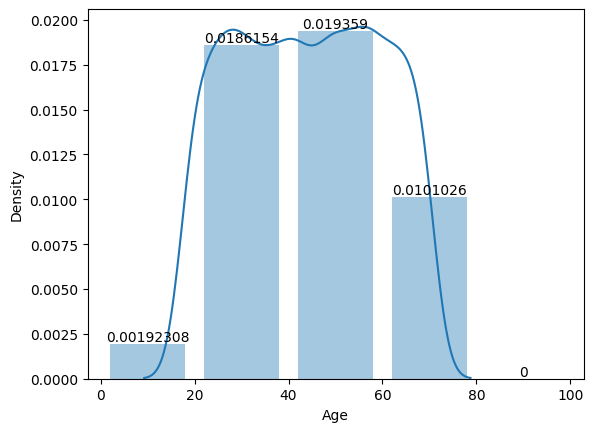

In [11]:
age = sns.distplot(df['Age'], hist_kws = {'rwidth': 0.80}, bins = np.array([0, 20, 40, 60, 80, 100]))
for bars in age.containers:
    age.bar_label(bars)

In [12]:
# Genderof Age

px.pie(df, names = "Gender", title = "Gender Distributio")

**Conclusion 2:** Mostly the people shopping from this mall are male with 68 percentage 

In [13]:
# most commonly purchased item

item_counts = df['Item Purchased'].value_counts().reset_index()

In [15]:
item_counts.columns = ['Item Purchased', 'Count']

In [16]:
px.bar(item_counts, 
      x = 'Item Purchased',
      y = 'Count',
      title = 'Most commonly purchased items')

**Conclusion 3:** Blouse is the most purchased item, followed by the jewwlary and pants

In [24]:
# 04. Seasonwise shopping distribution

px.pie(df, names = 'Season', title = "Season Pie Chart")

**Conclusion 4:** In spring and fall most of the people are visiting the mall

In [25]:
# 05. Location wise distribution

item_counts = df['Location'].value_counts().reset_index()
item_counts.columns = ['Location','Counts']

px.bar(
    item_counts,
    x = "Location",
    y = "Counts",
    title = "Location wise distribution"
)

**Conclusion 5:** Montana and California is the most visited mall according to the location

In [31]:
# 06. Preferred payment method

print(df['Payment Method'].value_counts())
px.pie(df, names = 'Payment Method', title = "Preferred Payment Method")

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


**Conclusion 6:** PayPal is the most used payment method followed by cash and credit card

In [37]:
# 07. Frequency of purchases distribution

px.histogram(df, 
            x = 'Frequency of Purchases',
            title = 'Frequency of purchases Distribution')

# px.pie(df, names = 'Frequency of Purchases')

**Conclusion 7:** After every 3 months, most people prefer to shop

In [35]:
# 08. Promo Code usage Distribution

px.pie(df, names = 'Promo Code Used', title = "Promo Code usage Distribution")

**Conclusion 8:** most of the people don't use any promocode

In [38]:
# 09. Shipping type Distribution

px.pie(df, names = 'Shipping Type', title = "Shipping type Distribution")

**Conclusion 9:** Most people prefer Free shipping

In [39]:
# 10. Average review rating gender wise

px.box(df, 
          x = 'Gender',
          y = 'Review Rating', 
          title = 'Average review rating gender wise')

**Conclusion 10:** Average rating by male is greater than female

In [40]:
# 11. Color Distribution

px.pie(df, names = 'Color', title = 'Color Distribution')

**Conclusion 11:** Olive color is the color most people are preferring